In [1]:
import numpy as np
import csv
import scipy.signal as signal
import matplotlib.pyplot as plt
from pylab import mpl
import twstock

mpl.rcParams["font.sans-serif"] = ["SimHei"]
stock2330 = twstock.Stock("2330")
stock2330.fetch_from(2020,1)

[Data(date=datetime.datetime(2020, 1, 2, 0, 0), capacity=33282120, turnover=11224165450, open=332.5, high=339.0, low=332.5, close=339.0, change=8.0, transaction=17160),
 Data(date=datetime.datetime(2020, 1, 3, 0, 0), capacity=42023268, turnover=14295651580, open=344.0, high=345.0, low=335.5, close=339.5, change=0.5, transaction=20545),
 Data(date=datetime.datetime(2020, 1, 6, 0, 0), capacity=45677057, turnover=15210531318, open=333.0, high=334.5, low=332.0, close=332.0, change=-7.5, transaction=22944),
 Data(date=datetime.datetime(2020, 1, 7, 0, 0), capacity=51746181, turnover=17053282011, open=332.5, high=333.0, low=326.5, close=329.5, change=-2.5, transaction=22362),
 Data(date=datetime.datetime(2020, 1, 8, 0, 0), capacity=37913748, turnover=12484410088, open=325.0, high=333.0, low=325.0, close=329.5, change=0.0, transaction=18228),
 Data(date=datetime.datetime(2020, 1, 9, 0, 0), capacity=32397504, turnover=10890847940, open=335.0, high=337.5, low=333.5, close=337.5, change=8.0, tran

In [2]:
data = stock2330.price

price = []                        # 讀取股價
for i in range( 1, len( data ) ):
    price.append(float(data[i]))


In [3]:
day = np.arange( len( price ) )
x = np.array( price )               # 轉換成陣列

b1 = np.ones( 5 ) / 5               # 週線
y1 = signal.lfilter ( b1, 1, x )

b2 = np.ones( 20 ) / 20             # 月線
y2 = signal.lfilter ( b2, 1, x )
x

array([339.5, 332. , 329.5, 329.5, 337.5, 339.5, 341.5, 346. , 340. ,
       334.5, 333. , 333. , 316.5, 320. , 315. , 325. , 327.5, 332.5,
       328. , 327.5, 331.5, 335. , 335. , 335. , 331.5, 322. , 326.5,
       325.5, 325. , 320. , 322. , 318.5, 316. , 311. , 317.5, 320.5,
       323. , 315. , 305.5, 307. , 302. , 294. , 290. , 276.5, 268. ,
       260. , 248. , 270. , 255. , 267.5, 277. , 280. , 273. , 267.5,
       274. , 271.5, 275.5, 283. , 285. , 283. , 279.5, 278.5, 285. ,
       287.5, 286.5, 306.5, 304. , 295. , 294. , 295.5, 294. , 298. ,
       296.5, 299. , 304.5, 295. , 295.5, 296. , 297.5, 297.5, 301. ,
       295. , 297. , 293. , 298. , 290. , 291.5, 294. , 297.5, 292. ,
       292. , 295.5, 296.5, 294. , 292. , 295.5, 296.5, 301. , 306. ,
       311.5, 318. , 319. ])

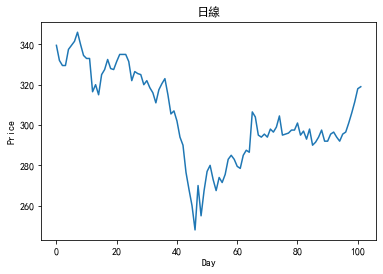

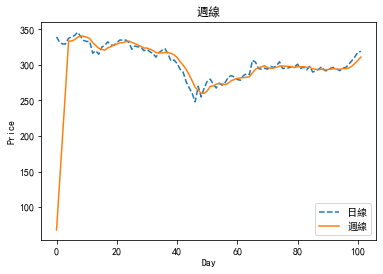

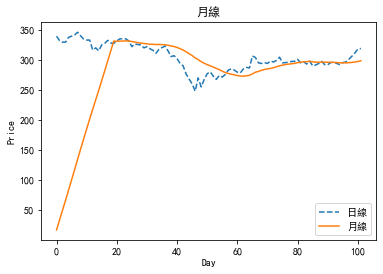

In [4]:
plt.figure(1)                             # 繪圖
plt.plot( day, x, '-', fillstyle = 'bottom' )
plt.title('日線')
plt.xlabel( 'Day' )
plt.ylabel( 'Price' )


plt.figure(2)
plt.plot( day, x, '--', label = "日線" )
plt.plot( day, y1, '-', label = "週線" )
plt.title('週線')
plt.xlabel( 'Day' )
plt.ylabel( 'Price' )
plt.legend(loc = "best")


plt.figure(3)
plt.plot( day, x, '--', label = "日線" )
plt.plot( day, y2, '-', label = "月線" )
plt.title('月線')
plt.xlabel( 'Day' )
plt.ylabel( 'Price' )
plt.legend(loc = "best")


plt.show()